# Ex 1
### Precizia masina

In [15]:
u = 1

while 1 + u != 1:
    u /= 10

u *= 10
print(u)

1e-15


In [17]:
if 1 + u != 1:
    print("test 1 passed")
if 1 + u/10 == 1:
    print("test 2 passed")

test 1 passed
test 2 passed


# Ex 2
### Operatiile +c si xc

In [18]:
import random

xAdd = 1.0
xMul = 1.0

y = u/10 
z = u/10

threshold = 100000000000000

add = (xAdd + y) + z == xAdd + (y + z)

if add:
    print("Pentru exemplul cu x = 1.0 operatia este asociativa")
else :
    print("Pentru exemplul cu x = 1.0 operatia este neasociativa")

while (xMul * y) * z == xMul * (y * z):
    xMul = random.randint(1,threshold) / random.randint(1,threshold)

print(f"Pentru x = {xMul} Operatia *c este neasociativa")


Pentru exemplul cu x = 1.0 operatia este neasociativa
Pentru x = 1.0 Operatia +c este neasociativa
Pentru x = 2.064321203446699 Operatia *c este neasociativa


# Ex 3
### Aproximari polinomiale ale fct sin

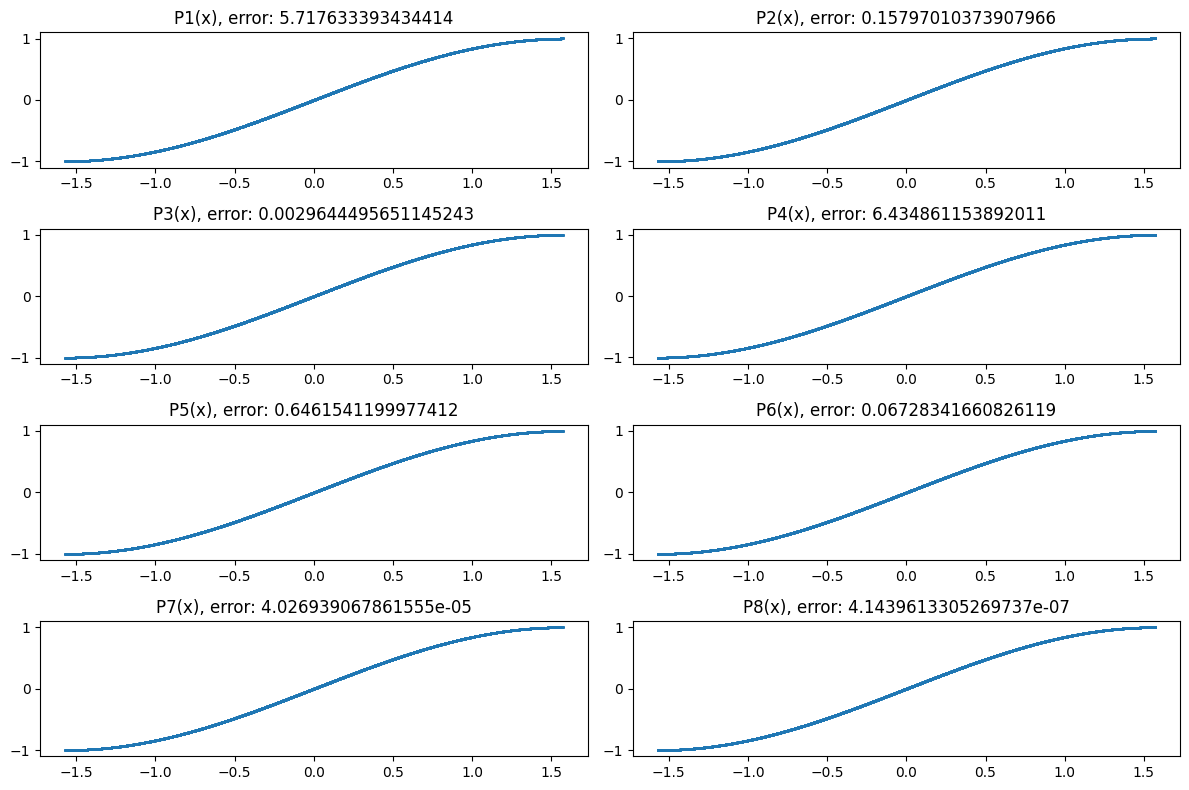

Top 3 cele mai mici erori
P8(x): 4.1439613305269737e-07
P7(x): 4.026939067861555e-05
P3(x): 0.0029644495651145243


In [25]:
import matplotlib.pyplot as plt
import numpy as np

c1 = 0.16666666666666666666666666666667
c2 = 0.00833333333333333333333333333333
c3 = 1.984126984126984126984126984127e-4
c4 = 2.7557319223985890652557319223986e-6
c5 = 2.5052108385441718775052108385442e-8
c6 = 1.6059043836821614599392377170155e-10

numberOfSamples = 10000
samples = np.random.uniform(-np.pi/2, np.pi/2, numberOfSamples)

P = [
    samples - c1 * (samples ** 3) + c2 * (samples ** 5),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - 0.166 * (samples ** 3) + 0.00833 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - 0.1666 * (samples ** 3) + 0.008333 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - 0.16666 * (samples ** 3) + 0.0083333 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9) - c5 * (samples ** 11),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9) - c5 * (samples ** 11) + c6 * (samples ** 13),
]

trueSin = np.sin(samples)

errors = [np.sum(np.abs(P[i] - trueSin)) for i in range(8)]

labels = [f"P{i+1}(x), error: {errors[i]}" for i in range(8)]

plt.figure(figsize=(12, 8))
for i, p in enumerate(P):
    plt.subplot(4, 2, i + 1)
    plt.scatter(samples, p, s=1, label=labels[i], alpha=0.5)
    plt.title(labels[i])

plt.tight_layout()
plt.show()

sortedErrors = sorted(enumerate(errors), key=lambda x: x[1])

print("Top 3 cele mai mici erori")
for i in range(3):
    print(f"P{sortedErrors[i][0]+1}(x): {sortedErrors[i][1]}")

In [28]:
def horner(P, x):
    n = len(P)
    result = P[0]
    
    for i in range(1, n):
        result = P[i] + result * x
    return result

# P1(x) = x^1 - c1 x^3 + c2 x^5
# Avem coef [1, 0, -c1, 0, c2] -> descr [c2, 0, -c1, 0, 1] pt ca horner sa evalueze corect

P = [c2, 0, -c1, 0, 1]
x = random.randint(1,100)
print(horner(P, x))

476154.175


In [31]:
# Test de timp
import timeit
np.random.seed(42)
coef = np.random.randint(-10, 10, 16)

x_values = np.random.uniform(-10, 10, 100000)

def evaluate_directly(x):
    result = 0
    for i in range(16):
        result += coef[i] * (x ** (15 - i))
    return result

horner_time = timeit.timeit(lambda: [horner(coef, x) for x in x_values], number=1)
direct_time = timeit.timeit(lambda: [evaluate_directly(x) for x in x_values], number=1)

print(f"Timp Horner: {horner_time:.6f} secunde")
print(f"Timp Clasic: {direct_time:.6f} secunde")

Timp Horner: 0.524877 secunde
Timp Clasic: 0.786411 secunde
